# DSP Practical Homework
Parham Hessabi

here we import all the needed packages. ignore this cell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import IPython

## Problem 1

### With respect to the given equation for DFT, find the equation for IDFT (Inverse DFT).

knowing the formula for IFT we can derive IDFT as
$$x\left[n\right] = \frac{1}{N}\sum_{k=0}^{N-1}{X\left[k\right]e^{\frac{j2\pi kn}{N}}}$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>

where N is the length of the input

### Implement a function called fft that takes a vector as input and produces its DFT vector as output.

In [2]:
def fft_element(x, k):
    N = len(x)
    return np.sum(x*np.exp(-2j*np.pi*k/N * np.arange(N)))

def fft(x):
    X = []
    for i, _ in enumerate(x):
        X.append(fft_element(x, i))
    return np.array(X)

#### testing the fft function compared to numpy fft
since we know numpy's fft calculation is "correct", we can validate our function's output by checking if the difference is lower than a certain threshold
$$\mid np.fft - output\mid < 10^{-8}$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>

accuracy = 1e-8 sounds close enough

In [3]:
x = np.random.randint(0, 100, 1000)

accuracy = 1e-8
ground_truth = np.fft.fft(x)
our_answer = fft(x)

(np.abs(ground_truth - our_answer) < accuracy).all()

True

### Implement the function for IDFT called ifft.

In [4]:
def ifft_element(x, k):
    N = len(x)
    return np.sum(x*np.exp(2j*np.pi*k/N * np.arange(N)))/N

def ifft(x):
    X = []
    for i, _ in enumerate(x):
        X.append(ifft_element(x, i))
    return np.array(X)

#### testing the ifft function compared to numpy ifft
again we need to validate our function

In [5]:
x = np.random.randint(0, 100, 1000)

accuracy = 1e-8
ground_truth = np.fft.ifft(x)
our_answer = ifft(x)

(np.abs(ground_truth - our_answer) < accuracy).all()

True

### Consider the signal 𝑥(𝑡)=cos⁡(𝜋𝑡). Construct the vector 𝑥[𝑛]=𝑥(𝑛𝑇) with length 𝑁. Plot this vector for 𝑇=1/2 and 𝑁=1000 for n ranging from -500 to 500.
• Obviously, when trying to reference the vector’s elements, 𝑥[𝑛], one should use a valid index ranging from 0 to 𝑁−1 (for python).

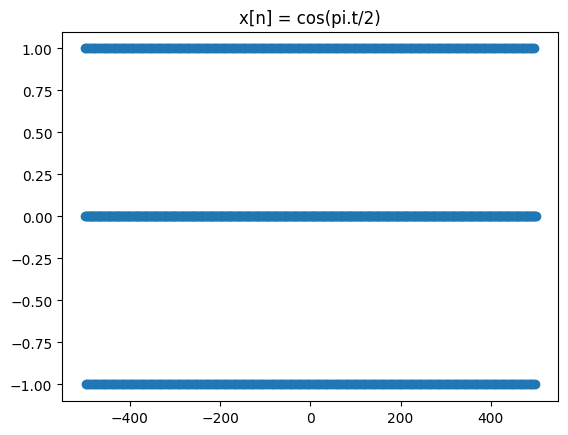

In [6]:
def function(t):
    return np.cos(np.pi*t)

def signal(n):
    return np.vectorize(function)(n)

n = np.arange(1000)-500
plt.title('x[n] = cos(pi.t/2)')
plt.scatter(n, signal(n*1/2))
plt.show()

### Compute Fourier transform of 𝑥(𝑡).

knowing Fourier transform of a cosine is just two impulses at it's period, the plot should look like this:

![fourier transform of cos(𝜋t)](https://i.stack.imgur.com/PC0aq.png)

(image taken from [this post](https://math.stackexchange.com/questions/2672957/what-does-the-fourier-transform-of-cos-pi-x-look-like) in stackexchange)

x(t) = cos⁡(𝜋𝑡/2) looks the same except the impulses are at 𝜋/2 and -𝜋/2 

### Use fft to compute DFT of 𝑥[𝑛], 𝑋[𝑘]. Plot 𝑋[𝑘]. Compare the result with 5.

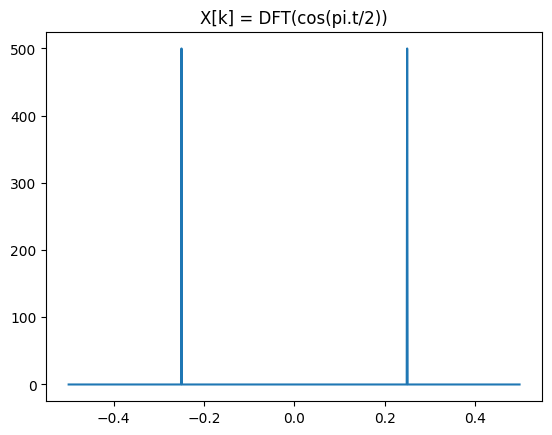

In [7]:
x = signal(n*1/2)
fft_x = fft(x)
plt.title('X[k] = DFT(cos(pi.t/2))')
plt.plot(n/1000, np.abs(fft_x))
plt.show()

as we can see the result is as expected. 


note: we normalize the x axis in fourier domain by the number of samples (taking frequency into account)

### Use ifft on 𝑋[𝑘]. Is the resulting vector equal to 𝑥[𝑛]?

In [8]:
x_prime = ifft(fft_x)
(x - np.real(x_prime) < 1e-12).all()

True

Yes, It should be equal, at least on paper! 

Computing operations between complex numbers in computer can be inaccurate since everything is being done in binary in the end, and floating point operations can only be precise to a certain degree. 

To give an example, as we know cos⁡(𝜋/2) should be equal to 0 but the answer according to numpy is:

In [9]:
np.cos(np.pi/2)

6.123233995736766e-17

Which is a pretty close to 0 to be fair...

In our result evaluations we should consider this error somehow. The exact acceptable error threshold can be determined according to the base operation errors but to keep things simple in this homework, we overlook that part and come up with estimated thresholds :D

### 8. Show the effects of changing N and T on the DFT of 𝑥[𝑛], in different plots.

C:\ProgramData\Anaconda3\envs\python3_GPU\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


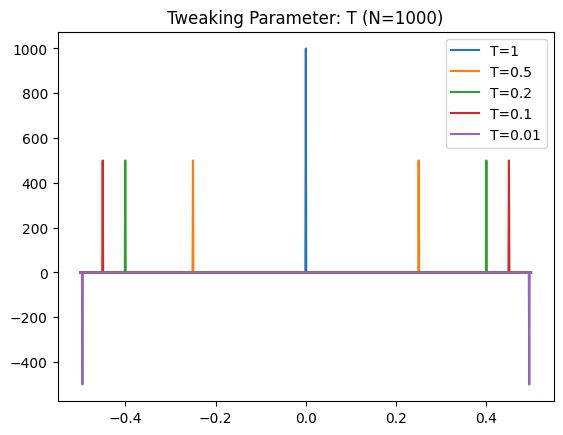

In [10]:
T_VALUES = [1, 1/2, 1/5, 1/10, 1/100]
N = 1000
n = np.arange(N)-N/2

for t in T_VALUES:
    plt.plot(n/1000, fft(signal(n*t)), label='T='+str(t))
    
    
plt.title('Tweaking Parameter: T (N=' + str(N) + ')')
plt.legend()
plt.show()

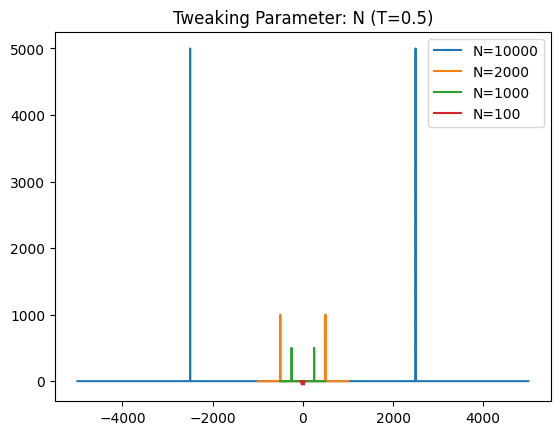

In [11]:
N_VALUES = [100, 1000, 2000, 10000]
T = 1/2

for N in sorted(N_VALUES, reverse=True):
    n = np.arange(N)-N/2
    plt.plot(n, fft(signal(n*T)), label='N='+str(N))

    
plt.title('Tweaking Parameter: N (T=' + str(T) + ')')
plt.legend()
plt.show()

## Problem 2

By calculating the frequency response of the system, we can determine the output of the system of any given input signal and vice versa. 

According to this formula:
$$H(jω) = \frac{Y(jω)}{X(jω)}$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>
by calculating the frequency response of a system, Y on the frequency domain could be determined given X and vice versa.

So all we have to do is transform them to the frequency domain and reconstruct the signal using the inverse fourier transform


For performance reasons we redefine fft and ifft as their numpy implementation

In [12]:
fft = np.fft.fft
ifft = np.fft.ifft

We have to keep in mind that when we are doing DFT transforms, length of each signal matters and doing matrix operations on different length signals can be problematic. 

### First Solution 
would be to always keep the pre-determined input array x[n] and its corresponding output y[n], and for the given signal y' of any length, we can pad these arrays with zeros to match the size of y' hence having no issues doing the matrix operations.

It is important to note that this approach suffers from storing and calculating the fft of the sample signals each time there is a new input.

In [13]:
rate, clean = scipy.io.wavfile.read('./clean1.wav')
rate, distorted = scipy.io.wavfile.read('./distorted1.wav')
rate2, distorted2 = scipy.io.wavfile.read('./distorted2.wav')

len_diff = len(distorted2) - len(distorted)

fft_x = fft(np.pad(clean, (0, len_diff), mode='constant'))
fft_y = fft(np.pad(distorted, (0, len_diff), mode='constant'))

H = fft_y/fft_x

fft_y = fft(distorted2)
fft_x = fft_y/H

x = ifft(fft_x)
scipy.io.wavfile.write('./recovered2.wav', rate, np.real(x).astype(distorted2.dtype))

### Second Solution
is that each time there is a new signal to process, break that signal to windows of size length(x[n]), and do the operation on each part separately and concatenate the results afterwards.

In [14]:
rate, clean = scipy.io.wavfile.read('./clean1.wav')
rate, distorted = scipy.io.wavfile.read('./distorted1.wav')

fft_x = fft(clean)
fft_y = fft(distorted)

H = fft_y/fft_x

N = len(H)

rate2, distorted2 = scipy.io.wavfile.read('./distorted2.wav')
distorted2_original = distorted2.copy()


N2 = len(distorted2)

pad_to_the_nearest_mult = ((N2//N+1)*N)-N2
distorted2 = np.pad(distorted2, (0, pad_to_the_nearest_mult), mode='constant')
distorted2 = distorted2.reshape(len(distorted2)//N, -1)

fft_y = fft(distorted2)
fft_x = fft_y/H


x2 = ifft(fft_x).reshape(-1)[:-pad_to_the_nearest_mult]
scipy.io.wavfile.write('./recovered2.wav', rate, np.real(x2).astype(distorted2.dtype))

### Comparing the Results

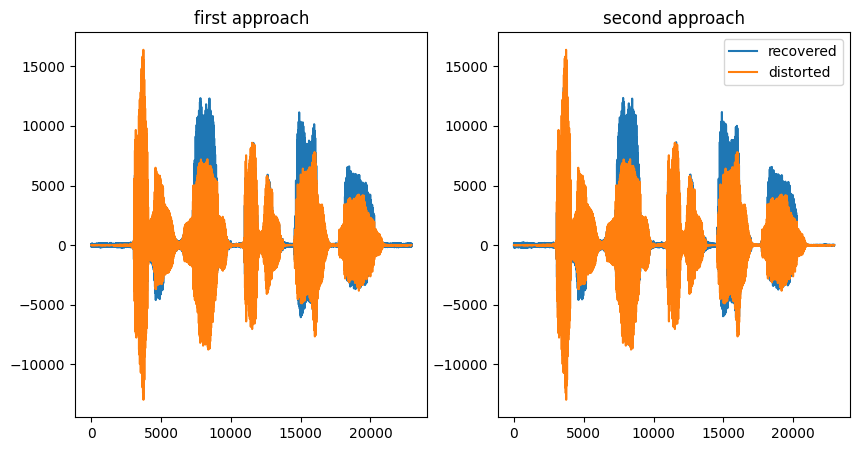

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].title.set_text('first approach')
ax[1].title.set_text('second approach')

ax[0].plot(np.real(x), label='recovered')
ax[0].plot(distorted2_original, label='distorted')
ax[1].plot(np.real(x2), label='recovered')
ax[1].plot(distorted2_original, label='distorted')

plt.legend()
plt.show()

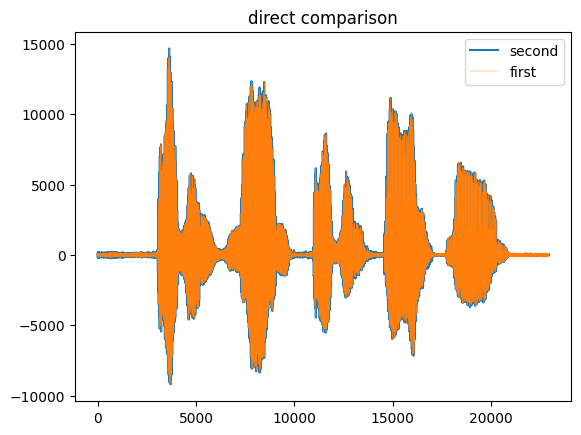

In [16]:
plt.plot(np.real(x2), label='second')
plt.plot(np.real(x), lw=0.3, label='first')

plt.title('direct comparison')
plt.legend()
plt.show()

## Problem 3

### Finding the Noise

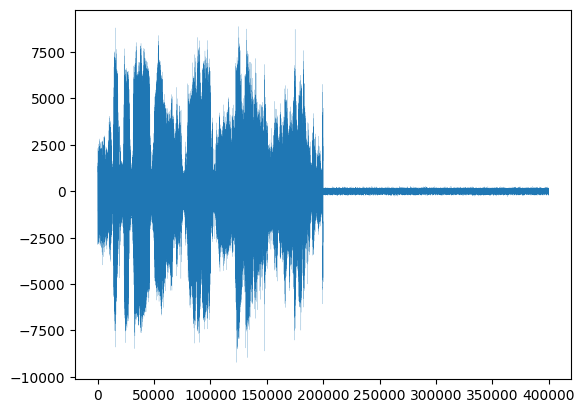

In [17]:
rate1, clean = scipy.io.wavfile.read('./music1.wav')
rate2, noisy = scipy.io.wavfile.read('./noisy1.wav')

fft_clean = fft(clean)
fft_noisy = fft(noisy)

plt.plot(noisy, lw=0.1)
plt.show()

### Noise Frequencies

We can see that between the range of 200k and 400k the signal is clearly just noise (speech gap). 
So we can determine the noise frequency by it.

By seeing the plot we can conclude that this is almost a uniform noise across the spectrum

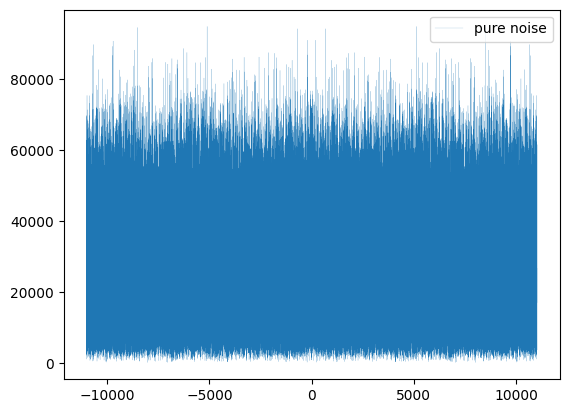

In [18]:
a = 200000
b = 400000
noise = noisy[a:b]
fft_noise = fft(noise)
fftfreq_noise = np.fft.fftfreq(len(noise), 1/rate2)
fftfreq_noisy = np.fft.fftfreq(len(noisy), 1/rate2)

# plt.plot(fftfreq_noisy, np.abs(fft_noisy), label='noisy signal')
plt.plot(fftfreq_noise, np.abs(fft_noise), lw=0.1, label='pure noise')
plt.plot()
plt.legend()
plt.show()

### Attenuating the Noise



#### Manual LowPass
First we try to manually filter the noisy signal by a lowpass and observe the results. Filter frequencies higher than 4500 for example. 

But this filtering results in loss of some details and it can be noticable by trained ears.

In [19]:
reconstructed = noisy[:200000]
reconstructed = fft(reconstructed)
freqs = np.fft.fftfreq(len(reconstructed), 1/rate2)
reconstructed[np.abs(freqs)>4500] = 0
reconstructed = ifft(reconstructed)
scipy.io.wavfile.write('./denoise1_lowpass.wav', rate2, np.real(reconstructed).astype(noisy.dtype))

print('Noisy Signal')
IPython.display.display(IPython.display.Audio('./noisy1.wav'))

print('Filtered Signal')
IPython.display.display(IPython.display.Audio('./denoise1_lowpass.wav'))

Noisy Signal


Filtered Signal


#### Subtracting the Noise

We attempt subtracting noise frequencies from the noisy signal using Spectral Subtraction.

This method includes: 
1. Subtracting the time-averaged noise spectrum from the noisy signal spectrum, 
2. Removing negative magnitudes at low signal-to-noise ratios,
3. Reconstructing the signal using the original phase.

In [20]:
fft_noisy = fft(noisy[:200000])
Y = np.abs(fft_noisy)
p = np.angle(fft_noisy)

# magnitude spectrum subtraction
s = np.mean(np.abs(fft_noise))
mag = Y - s

# negative magnitude correction
B = 0.1  # signal to noise ratio threshold
mask = mag<(B*Y)
mag[mask] = B*Y[mask]

X = mag*np.exp(p*1j)

scipy.io.wavfile.write('./denoise1.wav', rate2, np.real(ifft(X)).astype(noisy.dtype))

print('Noisy Signal')
IPython.display.display(IPython.display.Audio('./noisy1.wav'))

print('Magnitude Spectrum Subtraction')
IPython.display.display(IPython.display.Audio('./denoise1.wav'))

Noisy Signal


Magnitude Spectrum Subtraction


## Problem 4.1

### Z Transform

We know the common z-transform of the general form:
$$g[n] = r^{n}\cos(\omega n) . μ[n]$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>
is as follows:
$$G(z) =  \frac{1-r\cos(\omega)z^{-1}}{1-2r\cos(\omega)z^{-1} + r^{2}z^{-2}}$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>

so the z-transform of x[n] is equal to:

$$X(z) =  \frac{1-0.5*0.5z^{-1}}{1-2*0.5*0.5z^{-1} + 0.5^{2}z^{-2}}$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>

$$=  \frac{1-0.25z^{-1}}{1-0.5z^{-1} + 0.25z^{-2}}$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>

In [21]:
N = 8

In [22]:
def Xn(n):
    return (0.5**n)*np.cos(n*np.pi/3)

#### a)

In [23]:
xn = Xn(np.arange(N))
xn

array([ 1.        ,  0.25      , -0.125     , -0.125     , -0.03125   ,
        0.015625  ,  0.015625  ,  0.00390625])

#### b)

In [24]:
impulse = np.zeros(N)
impulse[0] = 1
impulse

array([1., 0., 0., 0., 0., 0., 0., 0.])

#### c)

first let's validate our answer using assigning z as:
$$z = e^{j\omega}$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>

in this case X(z) should be equal to fft(xn).

In [25]:
def Xz(z):
    return (1-0.25*(z**-1))/(1-0.5*(z**-1)+0.25*(z**-2))

z = np.exp(2j*np.pi/N)
xz = Xz(z**(np.arange(N, dtype='float64')))
print(fft(xn))
print(xz)

[1.00390625+0.j         1.28812864+0.06604733j 1.078125  -0.38671875j
 0.77437136-0.21520267j 0.71484375+0.j         0.77437136+0.21520267j
 1.078125  +0.38671875j 1.28812864-0.06604733j]
[1.        +0.j         1.28430826+0.06772751j 1.07692308-0.38461538j
 0.77378303-0.21443016j 0.71428571+0.j         0.77378303+0.21443016j
 1.07692308+0.38461538j 1.28430826-0.06772751j]


Well, these two clearly are not equal but they are close. In fact their difference is lower than 0.01

In [26]:
(np.abs(fft(xn) - xz) < 1e-2).all()

True

Now let's try increasing the number of samples (N) and check the difference of the two

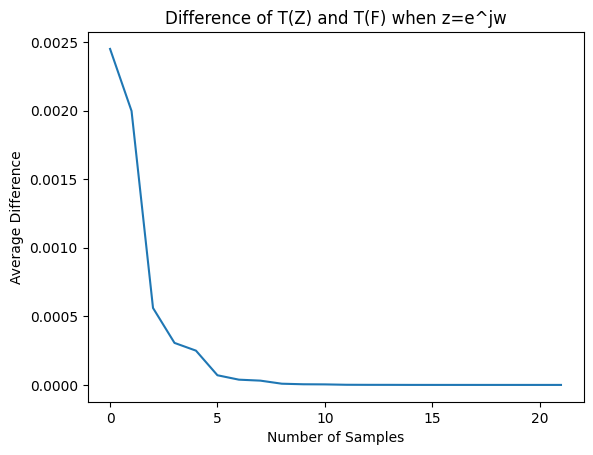

In [27]:
def average_diff(n):
    ft = fft(Xn(np.arange(n))) 
    z = np.exp(2j*np.pi/n)
    xn = Xz(z**(np.arange(n, dtype='float64')))
    return (np.abs(ft-xn)).mean()
    

ave_diffs = []
for i in range(8, 30):
    ave_diffs.append(average_diff(i))

plt.plot(ave_diffs)
plt.title('Difference of T(Z) and T(F) when z=e^jw')
plt.xlabel('Number of Samples')
plt.ylabel('Average Difference')
plt.show()

We can see that with increasing the number of samples extracted from x, we achieve more accurate results

### Finding Coefficients of Z-Transform

In [28]:
import scipy

numerator = [1, -0.25]
denominator = [1, -0.5, 0.25]
residuez, poles, _ = scipy.signal.residuez(numerator, denominator)
residuez, poles

(array([0.5+2.77555756e-17j, 0.5-2.77555756e-17j]),
 array([0.25+0.4330127j, 0.25-0.4330127j]))

### Constructing the Filter with the Coefficients

In [29]:
coeffs = residuez[0]*(poles[0]**np.arange(N)) + residuez[1]*(poles[1]**np.arange(N))

### Filtering the Impulse 

In [30]:
np.convolve(coeffs, impulse)

array([ 1.        +0.j,  0.25      +0.j, -0.125     +0.j, -0.125     +0.j,
       -0.03125   +0.j,  0.015625  +0.j,  0.015625  +0.j,  0.00390625+0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.        +0.j])

## Problem 4.2

Taking the Z-transform from both sides of the equation, we get:


$$\frac{Y(z)}{X(z)} = H(z) = \frac{1}{1+0.9z^{-1}}$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>

poles at:

$$1+0.9*z^{-1}=0$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>

$$\Rightarrow z = -0.9$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>


and no zeros.

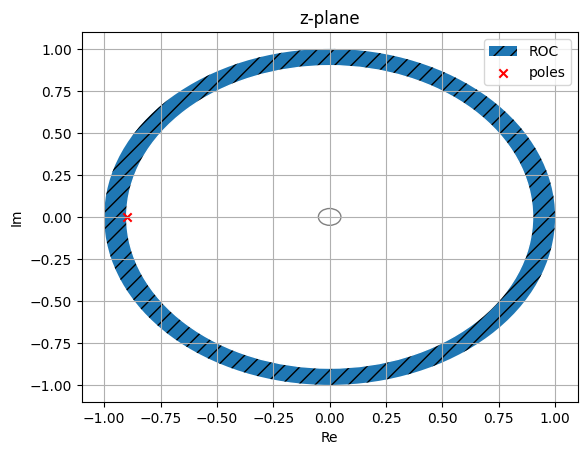

In [31]:
fig, ax = plt.subplots()

unit_circle = plt.Circle((0, 0), 1, label='ROC', hatch='//')
ROC = plt.Circle((0, 0), 0.9, color='white')
zero = plt.Circle((0, 0), 0.05, fill=False, color='grey')
ax.add_patch(unit_circle)
ax.add_patch(ROC)
ax.add_patch(zero)
ax.scatter(-0.9, 0, color='red', marker='x', label='poles')

plt.title('z-plane')
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid()
plt.legend()
plt.show()

Next we plot 
$$|H(e^{j\omega})|,\angle H(e^{j\omega})$$
<script type="text/javascript" src="https://www.hostmath.com/Math/MathJax.js?config=OK"></script>

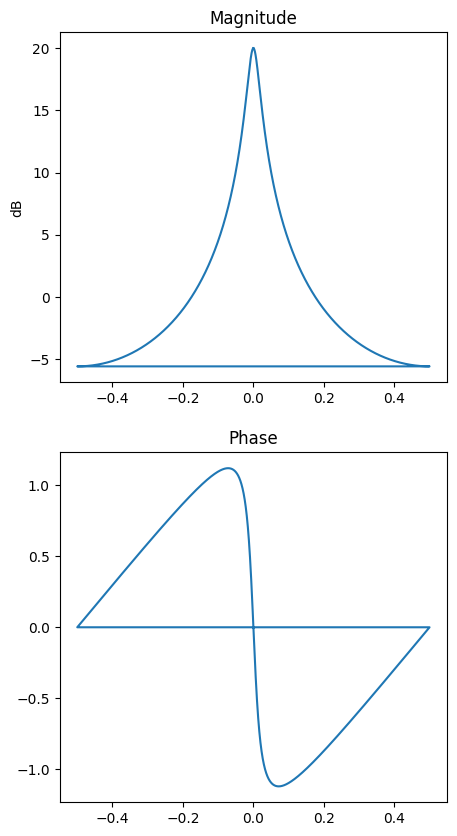

In [32]:
def Hz(z):
    return 1/(1+0.9*z**(-1))

N = 100000
x = np.linspace(-np.pi, np.pi, N)
z = np.exp(1j)
hz = Hz(z**x)
freqs = np.fft.fftfreq(N)

fig, ax = plt.subplots(2, 1, figsize=(5, 10))
ax[0].plot(freqs, 20*np.log10(np.abs(hz)))
ax[0].set_title('Magnitude')
ax[0].set_ylabel('dB')
ax[1].plot(freqs, np.angle(hz))
ax[1].set_title('Phase')
plt.show()